# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Add Matplotlib notebook to make figures interactive 
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 
### Get the Total Number of Rides for Each City Type

In [3]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby("type")["ride_id"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

### Get the Total Number of Drivers for Each City Type

In [4]:
# 2. Get the total drivers for each city type
total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

### Get the Total Amount of Fares for Each City Type

In [5]:
#  3. Get the total amount of fares for each city type
total_fares=pyber_data_df.groupby("type")["fare"].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

## Average fare per ride for each city types

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride=total_fares/total_rides
avg_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

## Average fare per driver for each city types

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver= total_fares/total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
# Initializing the DataFrame
pyber_summary_df=pd.DataFrame()

#Adding to the DataFrame
pyber_summary_df["Total Rides"]=total_rides
pyber_summary_df["Total Drivers"]=total_drivers
pyber_summary_df["Total Fares"]=total_fares
pyber_summary_df["Average Fare per Ride"]=avg_fare_per_ride
pyber_summary_df["Average Fare per Driver"]=avg_fare_per_driver

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Removing the index name "type"

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Formatting Pyber Summary DataFrame

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


**Results:** <br/>
The above table shows us the follow:

- The number of total rides is the lowest for rural cities (125 rides) while it is 5 times more for suburban cities (625 rides) and 13 times more for urban cities (1,625 rides). 

- The number of drivers for rural cities is the lowest (78 drivers), while it is around 6 times more for suburban cities (490 drivers) and 30 times more for urban cities (2,405).

- The total amount of fares for rural cities is the lowest (4,327,93 USD), while it is around 4.5 times more for suburban cities (19,356.33USD) and around 9 times more for urban cities (39,854.38USD)

- The average fare per ride is the highest for rural cities (34.62USD). It drops to 30.97USD for suburban cities and to 24.53USD for urban cities. 

- The average fare per driver is the highest for rural cities (55.49USD). It drops to 39.50USD for suburban cities and to 16.57USD for urban cities. 

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

## Total Fare Amount for each Date 

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_per_date = pyber_data_df.groupby(["type","date"]).sum()["fare"]
total_fare_per_date

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

## Reset the index

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_per_date=total_fare_per_date.reset_index()
total_fare_per_date.head(10)


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


## Create a pivote table 

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_per_date=total_fare_per_date.pivot(index="date", columns="type", values="fare")
total_fare_per_date.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


## Create a new DataFrame showing the total of the Fares from January to April

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_to_april_fares = total_fare_per_date.loc['2019-01-01':'2019-04-29']
jan_to_april_fares.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


**Note:** In the Challenge they asked for a date range "2019-01-01 through 2019-04-28" while it's written here till 2019-04-29. I chose to create the data till 29 as its 1 more day in April (not a new month)

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8
# df.index = pd.to_datetime(df.index)
jan_to_april_fares.index=pd.to_datetime(jan_to_april_fares.index)
jan_to_april_fares.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_april_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


## Get the Sum of Fares for each Week

In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = jan_to_april_fares.resample('W').sum()
weekly_fares_df.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


## Multiple-Line Chart showing the Total Fares by City Type 

<IPython.core.display.Javascript object>


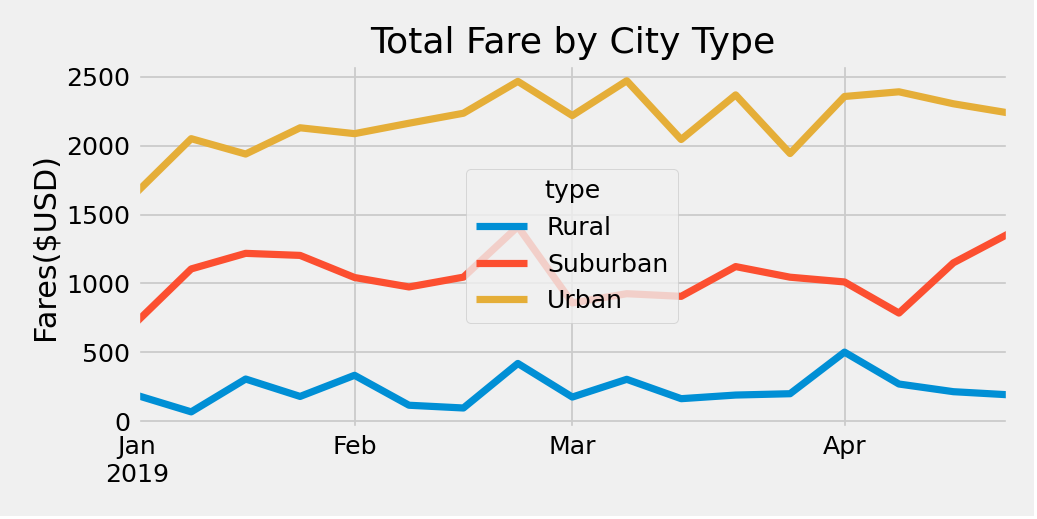

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plot the resampled DataFrame.
weekly_fares = weekly_fares_df.plot(figsize = (8,4))

# Add a title 
weekly_fares.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel("")
weekly_fares.set_ylabel("Fares($USD)")

# Show the figure
plt.show()
plt.tight_layout()

# Save the figure
plt.savefig("Analysis/PyBer_fare_summary.png")


**Results** <br/>

The above multiple-line chart show us the following:
- The amount of total fare for urban cities (yellow trend) is higher than the amount of total fares in suburban cities (rend trend) and rural cities (blue trend) for all the duration going from January till end of April.
- The amount of total fare for urban cities (yellow trend) is the highest for all the duration going from January till April. This amount ranges between 1500USD and 2500USD. 
- The amount of total fare for suburban cities (red trend) falls in between urban and rural cities with amount of total fares higher than 500USD but less than 1500USD.
- The amount of total fare for rural cities (blue trend) is the lowest for all the duration going from January till April. The amount of total fares is less than 500USD in the rural cities.
- A small peak is noticed for all 3 cities at the end of February 2019. This could be the result of an event that happened in the country. 
